<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Some-maps" data-toc-modified-id="Some-maps-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some maps</a></span><ul class="toc-item"><li><span><a href="#Example-maps-of-precipitation,-omega_500,-qvstar_925" data-toc-modified-id="Example-maps-of-precipitation,-omega_500,-qvstar_925-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example maps of precipitation, omega_500, qvstar_925</a></span><ul class="toc-item"><li><span><a href="#Daily" data-toc-modified-id="Daily-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Daily</a></span></li></ul></li><li><span><a href="#Example-maps-of-coarsened-precipitation" data-toc-modified-id="Example-maps-of-coarsened-precipitation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example maps of coarsened precipitation</a></span><ul class="toc-item"><li><span><a href="#Coasen-in-time" data-toc-modified-id="Coasen-in-time-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Coasen in time</a></span></li><li><span><a href="#Coarsen-in-space" data-toc-modified-id="Coarsen-in-space-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Coarsen in space</a></span></li></ul></li></ul></li><li><span><a href="#Figures-at-a-specific-scale" data-toc-modified-id="Figures-at-a-specific-scale-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figures at a specific scale</a></span><ul class="toc-item"><li><span><a href="#Maps-of-P-and-P_{FT}-above-fixed-percentile" data-toc-modified-id="Maps-of-P-and-P_{FT}-above-fixed-percentile-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Maps of P and P_{FT} above fixed percentile</a></span></li><li><span><a href="#Vertical-profiles" data-toc-modified-id="Vertical-profiles-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Vertical profiles</a></span></li><li><span><a href="#1D-PDFs" data-toc-modified-id="1D-PDFs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>1D PDFs</a></span><ul class="toc-item"><li><span><a href="#In-a-precipitation-bin" data-toc-modified-id="In-a-precipitation-bin-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>In a precipitation bin</a></span></li><li><span><a href="#Precipitation-and-scalings" data-toc-modified-id="Precipitation-and-scalings-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Precipitation and scalings</a></span></li></ul></li><li><span><a href="#Decomposition-of-the-variance" data-toc-modified-id="Decomposition-of-the-variance-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Decomposition of the variance</a></span></li><li><span><a href="#2D-PDFS" data-toc-modified-id="2D-PDFS-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>2D PDFS</a></span></li><li><span><a href="#Approximating-the-PDF" data-toc-modified-id="Approximating-the-PDF-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Approximating the PDF</a></span></li></ul></li><li><span><a href="#Multiscale-numbers" data-toc-modified-id="Multiscale-numbers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiscale numbers</a></span><ul class="toc-item"><li><span><a href="#Mask-low-sample-sizes" data-toc-modified-id="Mask-low-sample-sizes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mask low sample sizes</a></span></li></ul></li><li><span><a href="#Multiscale-figures" data-toc-modified-id="Multiscale-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiscale figures</a></span><ul class="toc-item"><li><span><a href="#epsilon-for-both-scalings-as-a-function-of-scale" data-toc-modified-id="epsilon-for-both-scalings-as-a-function-of-scale-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>epsilon for both scalings as a function of scale</a></span></li><li><span><a href="#Normalized-variance" data-toc-modified-id="Normalized-variance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normalized variance</a></span></li><li><span><a href="#Fractional-change-in-extreme-precipitation" data-toc-modified-id="Fractional-change-in-extreme-precipitation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fractional change in extreme precipitation</a></span></li><li><span><a href="#2-sigma-error-on-the-fractional-change-of-P" data-toc-modified-id="2-sigma-error-on-the-fractional-change-of-P-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>2-sigma error on the fractional change of P</a></span></li></ul></li><li><span><a href="#Subgridscale-plot" data-toc-modified-id="Subgridscale-plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Subgridscale plot</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import pandas as pd
import numpy as np
import numpy.ma as ma
import dask.array as da
import matplotlib.pyplot as plt
from matplotlib import mplDeprecation
import datetime as dt
import sys,os,glob
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import pickle

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from importingData import *
from scalingApproximations import *
from plotMaps import *
from plot1DInvLog import *
from statisticalDistributions import *
from slicingAndSubsetting import *
from outputResults import *
from CAMsettings import *
from plot2D import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['plot1DInvLog', 'thermoFunctions', 'statisticalDistributions', 'slicingAndSubsetting', 'plot2D', 'outputResults', 'thermoConstants', 'plotMaps', 'daskOptions', 'scalingApproximations', 'CAMsettings', 'environmentAndDirectories', 'importingData', 'physicalConstants']


In [3]:
time_strides = '1h','3h','6h','12h','1d','2d','4d','8d'
# time_strides = '3h','6h','12h','1d','2d','4d','8d'
resolutions = '1dx','2dx','3dx','4dx','5dx','6dx','7dx','8dx','9dx'
N_times = len(time_strides)
N_res = len(resolutions)

ranks_label = 'Q8-Q41'
dates_label = '185005010100-185105010000'
dates_label2 = '185005010100-185009010000'

In [4]:
print("missing results")

missing_dictionary = {}
for experiment in 'piControl','abrupt4xCO2':
    missing_dictionary[experiment] = {}
    for compset in 'FSPCAMm_AMIP','FAMIPC5':
        missing_dictionary[experiment][compset] = []
        
        resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,'r1i1p1','tropics')

        for time_stride in time_strides:
            for resolution in resolutions:
                filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates_label)
                dirpath = os.path.join(resultdir,time_stride,resolution)
#                 if not np.any(['dictionary' in p for p in glob.glob(os.path.join(dirpath,'*'))]):
#                     missing_dictionary.append("%s_%s"%(time_stride,resolution))
                if not np.any([filename in p for p in glob.glob(os.path.join(dirpath,'*'))]):
                    missing_dictionary[experiment][compset].append("%s_%s"%(time_stride,resolution))

print(missing_dictionary)

missing results
{'piControl': {'FSPCAMm_AMIP': [], 'FAMIPC5': ['1h_1dx']}, 'abrupt4xCO2': {'FSPCAMm_AMIP': ['1h_1dx', '1h_2dx', '1h_3dx', '1h_4dx', '1h_5dx', '1h_6dx', '1h_7dx', '1h_8dx', '1h_9dx'], 'FAMIPC5': ['1h_1dx', '1h_2dx', '1h_3dx', '1h_4dx', '1h_5dx', '1h_6dx', '1h_7dx', '1h_8dx', '1h_9dx']}}


In [6]:
print("choose run options")
scaling = 'omega500tsps'
compset = 'FSPCAMm_AMIP'
# compset = 'FAMIPC5'
experiment = 'piControl'
member = 'r1i1p1'
subset = 'tropics'
time_ref = '1h'
res_ref = '1dx'
daskarray = False

choose run options


In [7]:
# Results to analyze
resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,member,subset)

# Figure output directory
figdir = os.path.join(os.path.dirname(workdir),'figures','paper')
os.makedirs(figdir,exist_ok=True)

print()
print("get inputpaths")

# Local input directory
historyFilesSettings = getCAMHistoryFilesSettings()
inputdir, inputdir_processed_day, inputdir_processed_1hr, inputdir_results, inputdir_fx = \
    getInputDirectories(compset,experiment)


get inputpaths


# Some maps

## Example maps of precipitation, omega_500, qvstar_925

In [30]:
## Get longitude, latitude and landmask
print("load lontigude, latitude and landmask")

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)
lon2D = da.from_array(lon2D,chunks=lon2D.shape)
lat2D = da.from_array(lat2D,chunks=lat2D.shape)


landmask = fh.variables['landmask']

load lontigude, latitude and landmask


In [31]:
print("load physical variables data")

omega_id = 'OMEGA'
pr_id = 'PRECT'
ts_id = 'TS'
ta_id = 'T'
relhum_id = 'RELHUM'
ps_id = 'PS'
dates_maps = '185005010100','185005080000'
# dates_maps = '185005010100','185105010000'
handle = 'h0'
time_ref = '1h'
res_ref = '1dx'

output_suffix_maps = '%s'%('-'.join(dates_maps))

omega,pr,ta,relhum,ps = \
    getValues([omega_id,pr_id,ta_id,relhum_id,ps_id],
              compset,subset,experiment,time_ref,res_ref,
              daskarray=daskarray,dates=dates_maps,handle=handle)
pr *= rho_l    # convert from m/s to kg/m2/s

print("compute pressure levels")
    
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)
pres = computeP(ps)

load physical variables data
Importing OMEGA, PRECT, T, RELHUM, PS from 168 history files between 1850-05-01-03600 and 1850-05-08-00000
compute pressure levels


In [32]:
%%time
print("compute 2D surfaces of predictor variables")
p_500 = 50000
p_925 = 92500; levdim=1
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)
use925 = True
if use925:
    ta_925 = isobaricSurface(ta,pres,p_ref=p_925,levdim=levdim) 
    qvstar_925 = saturationSpecificHumidity(ta_925,p_925*np.ones(ps.shape))
else:
    qvstar_s = saturationSpecificHumidity(ts,ps)

compute 2D surfaces of predictor variables
CPU times: user 14.9 s, sys: 5.37 s, total: 20.2 s
Wall time: 20.1 s


### Daily

In [33]:
%%time
print("coarsen variables to daily")
pr_day = coarsenTimeStride(pr,'1d')
omega_500_day = coarsenTimeStride(omega_500,'1d')
qvstar_925_day = coarsenTimeStride(qvstar_925,'1d')

coarsen variables to daily
CPU times: user 2.3 ms, sys: 4.24 ms, total: 6.54 ms
Wall time: 5.86 ms


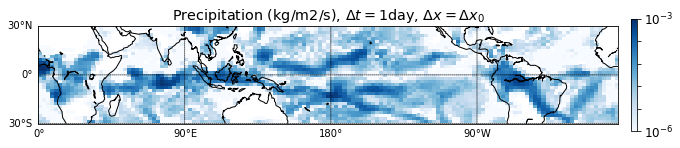

In [37]:
warnings.simplefilter("ignore",category=mplDeprecation)
plotMapTropics(lon2D,lat2D,pr_day[0],title=r'Precipitation (kg/m2/s), $\Delta t=1$day, $\Delta x=\Delta x_0$',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_pr_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

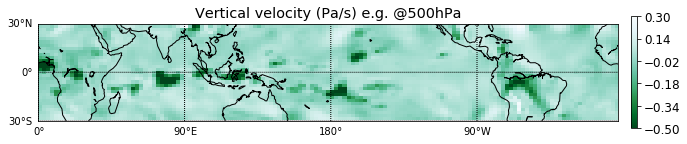

In [18]:
plotMapTropics(lon2D,lat2D,omega_500[0],title='Vertical velocity (Pa/s) e.g. @500hPa',cmap=plt.cm.BuGn_r,
               v_min=-0.5,v_max=0.3,mode='linear',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_omega_500_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

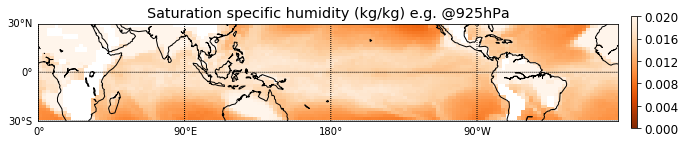

In [19]:
plotMapTropics(lon2D,lat2D,qvstar_925[0],title='Saturation specific humidity (kg/kg) e.g. @925hPa',cmap=plt.cm.Oranges_r,
               v_min =0,v_max=0.02,mode='linear',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_qvstar_925_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

## Example maps of coarsened precipitation

### Coasen in time

In [39]:
print("coarsen pr to weekly")
pr_week = coarsenTimeStride(pr,'7d')

coarsen pr to weekly


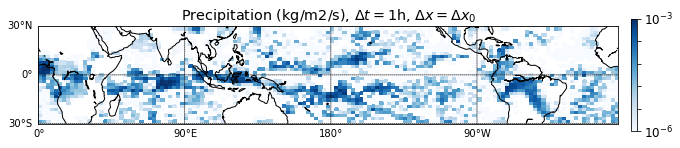

In [38]:
plotMapTropics(lon2D,lat2D,pr[0],title=r'Precipitation (kg/m2/s), $\Delta t=1$h, $\Delta x=\Delta x_0$',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_pr_1h_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

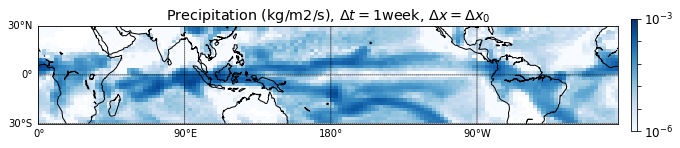

In [40]:
plotMapTropics(lon2D,lat2D,pr_week[0],title=r'Precipitation (kg/m2/s), $\Delta t=1$week, $\Delta x=\Delta x_0$',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_pr_week_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

### Coarsen in space

In [41]:
print("coarsen pr in space")
pr_day_2dx = coarsenResolution(pr_day,'2dx')
pr_day_4dx = coarsenResolution(pr_day,'4dx')

lon2D_2dx = coarsenResolution(lon2D,'2dx')
lon2D_4dx = coarsenResolution(lon2D,'4dx')
lat2D_2dx = coarsenResolution(lat2D,'2dx')
lat2D_4dx = coarsenResolution(lat2D,'4dx')

coarsen pr in space


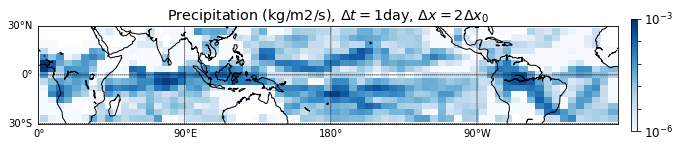

In [42]:
plotMapTropics(lon2D_2dx,lat2D_2dx,pr_day_2dx[0],title=r'Precipitation (kg/m2/s), $\Delta t=1$day, $\Delta x=2\Delta x_0$',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_day_2dx_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

In [ ]:
plotMapTropics(lon2D_4dx,lat2D_4dx,pr_day_4dx[0],title=r'Precipitation (kg/m2/s), $\Delta t=1$day, $\Delta x=4\Delta x_0$',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_day_4dx_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

In [8]:
print("load physical variables data")

omega_id = 'OMEGA'
pr_id = 'PRECT'
ts_id = 'TS'
ta_id = 'T'
relhum_id = 'RELHUM'
ps_id = 'PS'
dates_maps = '185005010100','185005080000'
handle = 'h0'
time_ref = '1d'
res_ref = '1dx'

output_suffix_maps = '%s'%('-'.join(dates_maps))

omega,pr,ta,relhum,ps = \
    getValues([omega_id,pr_id,ta_id,relhum_id,ps_id],
              compset,subset,experiment,time_ref,res_ref,
              daskarray=daskarray,dates=dates_maps,handle=handle)
pr *= rho_l    # convert from m/s to kg/m2/s

print("compute pressure levels")
    
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)
pres = computeP(ps)

load physical variables data
Importing OMEGA, PRECT, T, RELHUM, PS from 168 history files between 1850-05-01-03600 and 1850-05-08-00000
compute pressure levels


# Figures at a specific scale

In [15]:
print("Load results as a dictionary")
results = {}
for time_stride in time_strides:
    results[time_stride] = {}
    for resolution in resolutions:
        filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates_label)
        filepath = os.path.join(resultdir,time_stride,resolution,filename)
        results[time_stride][resolution] = pickle.load(open(filepath,'rb'))

all_varids = results['3h'][res_ref].keys()

Load results as a dictionary


In [16]:
print("choose one scale")
time_to_show = '1d'
res_to_show = '1dx'
results_dict = results[time_to_show][res_to_show]

choose one scale


In [17]:
print("Load results for complete variability decomposition")
filename = 'results_dictionary_variability_%s_%s.pickle'%(ranks_label,dates_label)
filepath = os.path.join(resultdir,time_to_show,res_to_show,filename)
results_variab_dict = pickle.load(open(filepath,'rb'))

Load results for complete variability decomposition


In [18]:
ranks_ref = results_dict['ranks_ref']
i_Q = indexOfRank(99.9,ranks_ref)
iQ_slice = slice(i_Q-5,i_Q+5)
iQ_min = 8
iQ_max = len(results_dict['ranks_ref'])

output_suffix_1scale = '%s_%s_%s'%(experiment,compset,dates_label)

## Maps of P and P_{FT} above fixed percentile

In [9]:
## Get longitude, latitude and landmask
print("load lontigude, latitude and landmask")

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)
lon2D = da.from_array(lon2D,chunks=lon2D.shape)
lat2D = da.from_array(lat2D,chunks=lat2D.shape)


landmask = fh.variables['landmask']

load lontigude, latitude and landmask


In [10]:
print("load physical variables data")

omega_id = 'OMEGA'
pr_id = 'PRECT'
ts_id = 'TS'
ta_id = 'T'
relhum_id = 'RELHUM'
ps_id = 'PS'
# dates_maps = '185005010100','185005080000'
dates_maps = '185005010100','185105010000'
handle = 'h0'
time_ref = '1d'
res_ref = '1dx'

output_suffix_maps = '%s'%('-'.join(dates_maps))

omega,pr,ta,relhum,ps = \
    getValues([omega_id,pr_id,ta_id,relhum_id,ps_id],
              compset,subset,experiment,time_ref,res_ref,
              daskarray=daskarray,dates=dates_maps,handle=handle)
pr *= rho_l    # convert from m/s to kg/m2/s

print("compute pressure levels")
    
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)
pres = computeP(ps)

load physical variables data
Importing OMEGA, PRECT, T, RELHUM, PS from 8759 history files between 1850-05-01-03600 and 1851-04-30-82800
compute pressure levels


In [12]:
def XMapAmountAboveValue(X,X_thres):

    mask_X_below_thres = X < X_thres
    X_above_thres = X.copy()
    X_above_thres[mask_X_below_thres] = 0
    X_frac_extremes = X_above_thres.sum(axis=0)*86400 # convert to kg/m2/d
    
    return X_frac_extremes

def XMapfractionAboveValue(X,X_thres):

    X_sum = X.sum()
    mask_X_below_thres = X < X_thres
    X_above_thres = X.copy()
    X_above_thres[mask_X_below_thres] = 0
    X_above_thres_2D = X_above_thres.sum(axis=0)
    X_frac_extremes = X_above_thres_2D/X_sum
    
    return X_frac_extremes

def XMapfractionBetweenValues(X,X_range):

    X_sum = X.sum()
    mask_X_outside = np.logical_or(X < X_range[0],X > X_range[1])
    X_between = X.copy()
    X_between[mask_X_outside] = 0
    X_between_2D = X_beween.sum(axis=0)
    X_frac_extremes = X_between_2D/X_sum
    
    return X_frac_extremes

In [19]:
Q_thres = 99
iQ_thres = indexOfRank(Q_thres,ranks_ref)
# Compute fraction of rain above chosen percentile
pr_thres = results_dict['percentiles_pr'][iQ_thres]
pr_frac_extremes = XMapAmountAboveValue(pr,pr_thres)

In [20]:
# Compute pointwise scaling
pr_FT = scalingOGS09(omega,ta,pres,levdim=1)

In [21]:
# Compute percentiles of pointwise FT scaling
ranks_pr_FT, percentiles_pr_FT, bins_pr_FT = computePercentilesAndBinsFromRanks(pr_FT,ranks_ref)
# Compute fraction of pointwise scaling above chosen percentile
pr_FT_frac_extremes = XMapAmountAboveValue(pr_FT,percentiles_pr_FT[iQ_thres])

In [22]:
# Compute single-level scaling
p_500 = 50000; p_925 = 92500; levdim = 1
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)
ta_925 = isobaricSurface(ta,pres,p_ref=p_925,levdim=levdim) 
qvstar_925 = saturationSpecificHumidity(ta_925,p_925*np.ones(ps.shape))
pr_SL = singleLevelScalingFromOmegaQ(omega_500,qvstar_925)

In [23]:
pr_SL[np.isnan(pr_SL)] = 0

In [24]:
# Compute percentiles of pointwise SL scaling
ranks_pr_SL, percentiles_pr_SL, bins_pr_SL = computePercentilesAndBinsFromRanks(pr_SL,ranks_ref)
# Compute fraction of pointwise scaling above chosen percentile
pr_SL_frac_extremes = XMapAmountAboveValue(pr_SL,percentiles_pr_SL[iQ_thres])

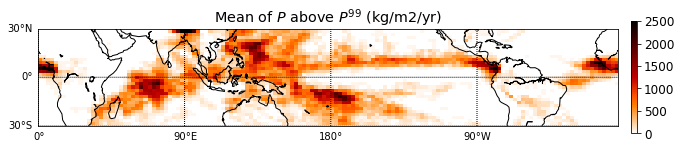

In [27]:
warnings.simplefilter("ignore",category=mplDeprecation)
cmap = plt.cm.gist_heat_r
# cmap = plt.cm.magma_r
# plotMapTropics(lon2D,lat2D,pr_frac_extremes,title=r'Mean of $P$ above $P^{99}$ (kg/m2/yr)',cmap=cmap,
#                v_min=0,v_max=3e-2,plotfunction='pcolormesh')
plotMapTropics(lon2D,lat2D,pr_frac_extremes,title=r'Mean of $P$ above $P^{99}$ (kg/m2/yr)',cmap=cmap,
               v_min=0,v_max=2.5e3,plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_pr_above_Q99_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

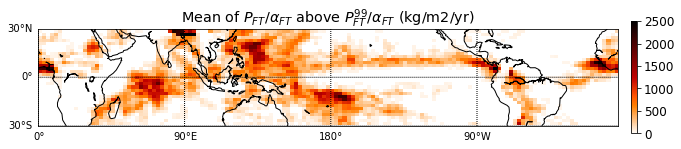

In [28]:
warnings.simplefilter("ignore",category=mplDeprecation)
cmap = plt.cm.gist_heat_r
# cmap = plt.cm.magma_r
# plotMapTropics(lon2D,lat2D,pr_FT_frac_extremes,title=r'Mean of $P_{FT}/\alpha_{FT}$ above $P_{FT}^{99}/\alpha_{FT}$ (kg/m2/yr)',cmap=cmap,
#                v_min=0,v_max=3e-2,plotfunction='pcolormesh')
plotMapTropics(lon2D,lat2D,pr_FT_frac_extremes,title=r'Mean of $P_{FT}/\alpha_{FT}$ above $P_{FT}^{99}/\alpha_{FT}$ (kg/m2/yr)',cmap=cmap,
               v_min=0,v_max=2.5e3,plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_prFT_above_Q99_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

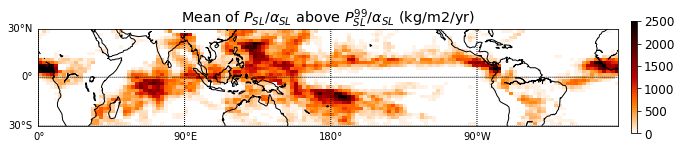

In [29]:
warnings.simplefilter("ignore",category=mplDeprecation)
cmap = plt.cm.gist_heat_r
# cmap = plt.cm.magma_r
# plotMapTropics(lon2D,lat2D,pr_SL_frac_extremes,title=r'Mean of $P_{SL}/\alpha_{SL}$ above $P_{SL}^{99}/\alpha_{SL}$ (kg/m2/yr)',cmap=cmap,
#                v_min=0,v_max=3e-2,plotfunction='pcolormesh')
plotMapTropics(lon2D,lat2D,pr_SL_frac_extremes,title=r'Mean of $P_{SL}/\alpha_{SL}$ above $P_{SL}^{99}/\alpha_{SL}$ (kg/m2/yr)',cmap=cmap,
               v_min=0,v_max=2.5e3,plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'paper_map_prSL_above_Q99_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

## Vertical profiles

In [168]:
ranks, centers, bins = computePercentilesAndBinsFromRanks(pr.flatten(),ranks_ref)
percentiles = adjustRanks(centers,ranks,ranks_ref)

rank_locations= {}
for rank in ranks_ref:
    rank_id  = "%2.4f"%rank
    print(rank_id,end=' ')
    rank_locations[rank_id] = getRankLocations(rank,pr,ranks,bins,rank_locations)
print()

0.0000 20.5672 36.9043 49.8813 60.1893 68.3772 74.8811 80.0474 84.1511 87.4107 90.0000 92.0567 93.6904 94.9881 96.0189 96.8377 97.4881 98.0047 98.4151 98.7411 99.0000 99.2057 99.3690 99.4988 99.6019 99.6838 99.7488 99.8005 99.8415 99.8741 99.9000 99.9206 99.9369 99.9499 99.9602 99.9684 99.9749 99.9800 99.9842 99.9874 99.9900 


In [169]:
print("Extract vertical profiles in Q-slice")

iQ_slice_profiles = slice(i_Q,i_Q+1)
iQ_ref = range(100)[iQ_slice_profiles]


varnames_for_profiles = ('omega','ta','pres','relhum')

ranks_tune = ["%2.4f"%(ranks_ref[iQ-1]) for iQ in iQ_ref]
# Initialize list for each variable
for varname in varnames_for_profiles:
    setattr(thismodule,"%s_ref_list"%varname,[])
# fill list with sample variables at each percentile
for rank in ranks_tune:
    stencil_Q = rank_locations[rank]
    for varname in varnames_for_profiles:
        var = getattr(thismodule,varname)
        var_list = getattr(thismodule,"%s_ref_list"%varname)
        var_list.append(sampleFlattened(var,stencil_Q))
# concat arrays from list
for varname in varnames_for_profiles:
    var_list = getattr(thismodule,"%s_ref_list"%varname)
    setattr(thismodule,"%s_ref"%varname,np.hstack(var_list))

qvstar_ref = saturationSpecificHumidity(ta_ref,pres_ref)

Extract vertical profiles in Q-slice


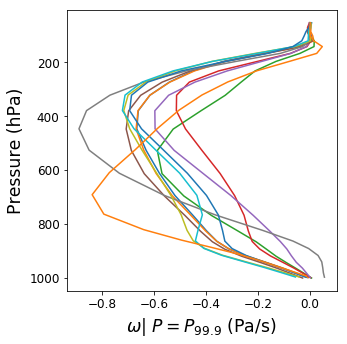

In [122]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# var_to_plot = omega_ref.copy()
# var_to_plot[:,6] = np.nan
# for i in range(var_to_plot.shape[1])[:12]:
#     ax.plot(var_to_plot[5:,i],pres_ref[5:,i]/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$\omega |\,\, P=P_{99.9}$ (Pa/s)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_omega_profiles_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

In [17]:
# pres_ref_mean = np.mean(pres_ref,axis=1)
# omega_ref_mean = np.mean(omega_ref,axis=1)
# qvstar_ref_mean = np.mean(qvstar_ref,axis=1)

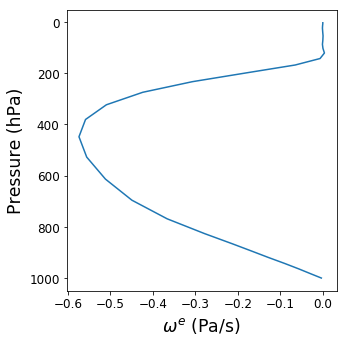

In [18]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# ax.plot(omega_ref_mean,pres_ref_mean/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$\omega^e$ (Pa/s)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_ref_omega_profile_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

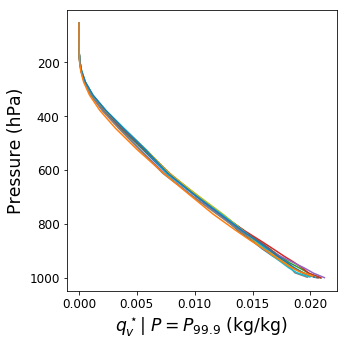

In [64]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# var_to_plot = qvstar_ref.copy()
# var_to_plot[:,6] = np.nan
# for i in range(var_to_plot.shape[1])[:12]:
#     ax.plot(var_to_plot[5:,i],pres_ref[5:,i]/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$q_v^\star  |\,\, P=P_{99.9}$ (kg/kg)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_qvstar_profiles_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

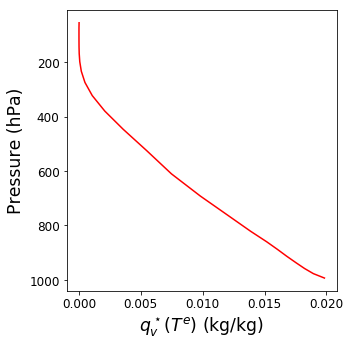

In [65]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# ax.plot(qvstar_ref_mean[5:],pres_ref_mean[5:]/100,'r')
# ax.invert_yaxis()
# ax.set_xlabel(r'$q_v^\star(T^e)$ (kg/kg)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_ref_qvstar_profile_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

## 1D PDFs

### In a precipitation bin

In [12]:
iQ_start = i_Q-3
iQ_stop = i_Q+3

> Plot pdf of last computed conditioned on high percentiles of pr


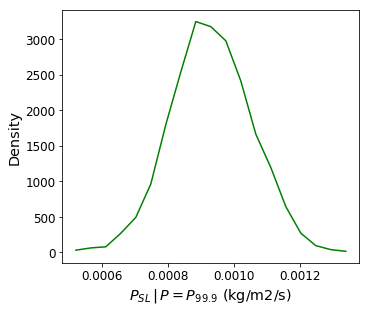

In [23]:
print("> Plot pdf of last computed conditioned on high percentiles of pr")

# varname = 'pr_scOGS09'
varname = 'pr_sc'
varname_ref = 'pr'

perc_name = 'percentiles_%s_%s_Q%dQ%d'%(varname,varname_ref,iQ_start,iQ_stop)
den_name = 'pdf1D_%s_%s_Q%dQ%d'%(varname,varname_ref,iQ_start,iQ_stop)

fig,ax = plt.subplots(figsize=(5.5,4.5))
plt.plot(results_dict[perc_name],results_dict[den_name],'g')
ax.set_xlabel(r"$P_{SL}\,|\,P=P_{99.9}$ (kg/m2/s)",fontsize='x-large')
ax.set_ylabel('Density',fontsize='x-large')

plt.savefig(os.path.join(figdir,'paper_conditional_pdf_%s_%s_%s_%s_%s.pdf'%(varname,varname_ref,
                                                                            ("%2.4f"%ranks_ref[iQ_start]).replace(".",""),
                                                                            ("%2.4f"%ranks_ref[iQ_stop]).replace(".",""),
                                                                            output_suffix_1scale)),
                bbox_inches='tight')

plt.show()

### Precipitation and scalings

In [ ]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')
ax.set_ylim((1e-6,3e-3))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)
# 90% confidence interval for pointwise scaling 2
subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_sc_I90'][:,0],results_dict['pr_sc_I90'][:,1]],
                         col='green',transformX=False)
# Interquartile range for pointwise scaling 2
# subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_sc_IQR'][:,0],results_dict['pr_sc_IQR'][:,1]],
#                          col='green',transformX=False)
# Mean of pointwise scaling 2
subplotRanksILog(ax,results_dict['ranks_ref'],[results_dict['percentiles'],results_dict['pr_sc_prQ'],
                                               results_dict['pr_sc_vQ']],col=['k','green','k'],ltype=['-','-',':'],\
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall percentile (kg/m2/s)')
ax.set_title(r'Single level scaling')

ax.text(0.04,0.9,'(a)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_pdf_pr_and_pr_sc_mean_I90_grayzone_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

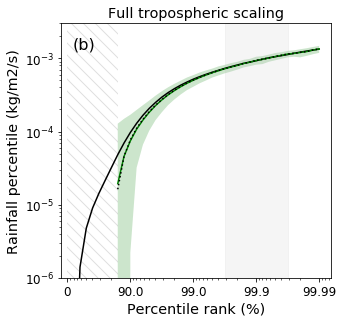

In [35]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')
ax.set_ylim((1e-6,3e-3))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)
# 90% confidence interval for pointwise scaling 2
subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_scOGS09_I90'][:,0],
                                                       results_dict['pr_scOGS09_I90'][:,1]],
                         col='green',transformX=False)
subplotRanksILog(ax,results_dict['ranks_ref'],[results_dict['percentiles'],results_dict['pr_scOGS09_prQ'],
                                               results_dict['pr_scOGS09_vQ']],col=['k','green','k'],ltype=['-','-',':'],\
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall percentile (kg/m2/s)')
ax.set_title('Full tropospheric scaling')

ax.text(0.04,0.9,'(b)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_pdf_pr_and_pr_scOGS09_mean_I90_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

## Decomposition of the variance

> plot variance and corresponding contributions


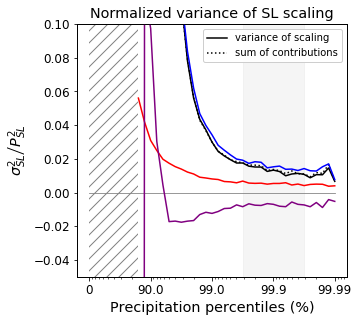

CPU times: user 1.06 s, sys: 30.3 ms, total: 1.09 s
Wall time: 1.15 s


In [22]:
%%time
print("> plot variance and corresponding contributions")

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
ax.set_ylim((-.3,.6))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)

# zero line
addZeroLine(ax,results_dict['ranks_ref'])

# Variance
subplotRanksILog(ax,results_dict['ranks_ref'],
                 results_dict['norm_var_pr_sc_prQ'],
                 col='k',ltype='-',transformX=False)

c_varQ = results_dict['contribQOmega_var_varQ']
c_varOm = results_dict['contribQOmega_var_varOmega']
c_cov = results_dict['contribQOmega_var_covQOmega'] + results_dict['contribQOmega_var_covQ2Omega2']

# Contributions
ax2 = ax.twinx()
subplotRanksILog(ax2,results_dict['ranks_ref'],
                 [c_varQ,
                  c_varOm,
                  c_cov],
                 col=['r','b','purple'],ltype=['-','-','-'],transformX=False)
# Sum
subplotRanksILog(ax,results_dict['ranks_ref'],
                 c_varQ+c_varOm+c_cov,
                 col='k',ltype=':',transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),transformX=True)

# leg = ax.legend([r'variance of scaling',
#                  r'contribution in $Var(q_v^\star)$',
#                  r'contribution in $Var(\omega)$',
#                  r'covariance term'],
#                  loc='upper left',
#                  framealpha=0.95,
#                  ncol=1)

leg = ax.legend([r'variance of scaling',
                 r'sum of contributions'],
                 loc='upper right',
                 framealpha=0.95,
                 ncol=1)


ax.set_ylim((-0.05,0.1))
ax2.set_ylim((-0.05,0.1))
ax2.axes.get_yaxis().set_visible(False)

ax.set_xlabel('Precipitation percentiles (%)')
ax.set_ylabel(r'$\left.\sigma_{SL}^2 \right/ P_{SL}^2$')
ax.set_title(r'Normalized variance of SL scaling')

plt.savefig(os.path.join(figdir,'paper_var_and_contributions_omega_q_%s.pdf'%output_suffix_1scale),
            bbox_inches='tight')

plt.show()

Plot contributions to normalized variability for 1d, 1dx, SL and FT scalings


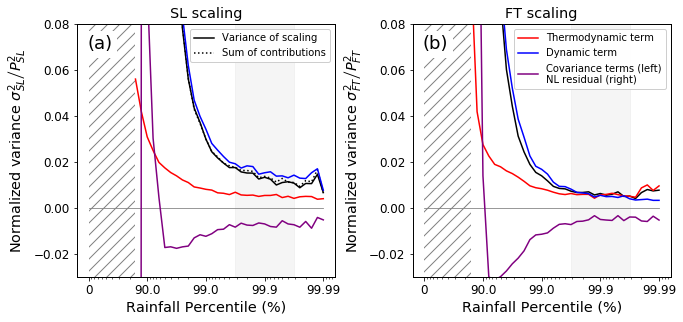

In [24]:
# %%time
print("Plot contributions to normalized variability for 1d, 1dx, SL and FT scalings")

fig, (ax,axx) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))

ymin,ymax = (-.03,.08)
ax.set_ylim((ymin,ymax))
axx.set_ylim((ymin,ymax))


# zero line
addZeroLine(ax,results_dict['ranks_ref'])
addZeroLine(axx,results_dict['ranks_ref'])

# Variance
subplotRanksILog(ax,results_dict['ranks_ref'],
                 results_dict['norm_var_pr_sc_prQ'],
                 col='k',ltype='-',transformX=False)
subplotRanksILog(axx,results_dict['ranks_ref'],
                 results_dict['norm_var_pr_scOGS09_prQ'],
                 col='k',ltype='-',transformX=False)

# Contributions
c_varQ = results_dict['contribQOmega_var_varQ']
c_varOm = results_dict['contribQOmega_var_varOmega']
c_cov = results_dict['contribQOmega_var_covQOmega'] + results_dict['contribQOmega_var_covQ2Omega2']

# Sum
subplotRanksILog(ax,results_dict['ranks_ref'],
                 c_varQ+c_varOm+c_cov,
                 col='k',ltype=':',transformX=False)

cFT_varQ = results_variab_dict['contribQOmega_varOGS09_QPrime']
cFT_varOm = results_variab_dict['contribQOmega_varOGS09_OmegaPrime']
cFT_res = results_variab_dict['contribQOmega_varOGS09_residual']

ax2 = ax.twinx()
axx2 = axx.twinx()
subplotRanksILog(ax2,results_dict['ranks_ref'],
                 [c_varQ,
                  c_varOm,
                  c_cov],
                 col=['r','b','purple'],ltype=['-','-','-'],transformX=False)
# subplotRanksILog(ax2,results_dict['ranks_ref'],
#                  [results_dict['contribQOmega_var_covQOmega'],
#                   results_dict['contribQOmega_var_covQ2Omega2']],
#                  col=['green','green'],ltype=['-.',':'],transformX=False)
subplotRanksILog(axx2,results_dict['ranks_ref'],
                 [cFT_varQ,
                  cFT_varOm,
                  cFT_res],
                 col=['r','b','purple'],ltype=['-','-','-'],transformX=False)

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)
subplotXShadingRanksILog(axx,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),transformX=True)
addXHatchRanksILog(axx,results_dict['ranks_ref'],(0,iQ_min),transformX=True)

leg = ax.legend([r'Variance of scaling',
                 r'Sum of contributions'],
                 loc='upper right',
                 framealpha=0.95,
                 ncol=1)

leg = axx2.legend([r'Thermodynamic term',
                 r'Dynamic term',
                 'Covariance terms (left)\nNL residual (right)'],
                 loc='upper right',
                 framealpha=0.95,
                 ncol=1)


# ax.set_ylim((-0.05,0.1))
ax2.set_ylim((ymin,ymax))
ax2.axes.get_yaxis().set_visible(False)
axx2.set_ylim((ymin,ymax))
axx2.axes.get_yaxis().set_visible(False)

ax.set_xlabel('Rainfall Percentile (%)')
ax.set_ylabel(r'Normalized variance $\left.\sigma_{SL}^2 \right/ P_{SL}^2$')
ax.set_title(r'SL scaling')
axx.set_xlabel('Rainfall Percentile (%)')
axx.set_ylabel(r'Normalized variance $\left.\sigma_{FT}^2 \right/ P_{FT}^2$')
axx.set_title(r'FT scaling')

# Subplot labels
t0 = ax.text(0.04,0.9,'(a)',transform = ax.transAxes,fontsize=18)
t0.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
t1 = axx.text(0.04,0.9,'(b)',transform = axx.transAxes,fontsize=18)
t1.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))

plt.savefig(os.path.join(figdir,'paper_var_and_contributions_omega_q_SL_FT_%s.pdf'%output_suffix_1scale),
            bbox_inches='tight')

plt.show()

## 2D PDFS

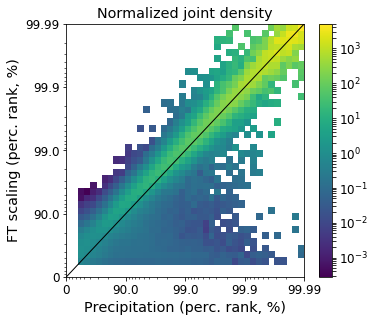

In [83]:
varname1 = 'pr'
varname2 = 'pr_scOGS09'

norm_density2D_name = "norm_density2D_%s_%s"%(varname1,varname2)
pdf2D = results_dict[norm_density2D_name]

fig, ax = plt.subplots(figsize=(5.5,4.5))

# cmap = plt.cm.RdBu_r
# cmap = plt.cm.RdGy_r
# cmap = plt.cm.RdYlBu_r
# cmap = plt.cm.PRGn
cmap = plt.cm.viridis

cb = subplot2DRanksILog(ax,ranks_ref,ranks_ref,pdf2D,cmap=cmap,
        transformX=True,transformY=True,Z_mode='log',range_type='full_positive')

# cb.ax.set_ylabel('Normalized density')

add1to1Line(ax)

ax.set_xlabel('Precipitation (perc. rank, %)')
ax.set_ylabel('FT scaling (perc. rank, %)')
ax.set_title(r'Normalized joint density')

plt.savefig(os.path.join(figdir,'paper_norm_pdf2D_%s_and_%s_%s.pdf'%(varname1,varname2,output_suffix_1scale)),
                bbox_inches='tight')
plt.show()

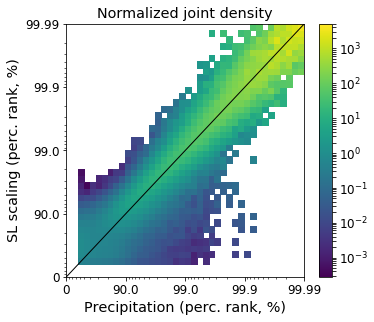

In [93]:
varname1 = 'pr'
varname2 = 'pr_sc'

norm_density2D_name = "norm_density2D_%s_%s"%(varname1,varname2)
pdf2D = results_dict[norm_density2D_name]

fig, ax = plt.subplots(figsize=(5.5,4.5))

# cmap = plt.cm.RdBu_r
# cmap = plt.cm.RdGy_r
# cmap = plt.cm.RdYlBu_r
# cmap = plt.cm.PRGn
cmap = plt.cm.viridis

# Define range from FT values
Z = results_dict["norm_density2D_pr_pr_scOGS09"]
vmin = np.nanmin(Z[Z>0])
vmax = np.nanmax(Z)

cb = subplot2DRanksILog(ax,ranks_ref,ranks_ref,pdf2D,cmap=cmap,
        transformX=True,transformY=True,Z_mode='log',range_type='full_positive',vmin=vmin,vmax=vmax)

# cb.ax.set_ylabel('Normalized density')

add1to1Line(ax)

ax.set_xlabel('Precipitation (perc. rank, %)')
ax.set_ylabel('SL scaling (perc. rank, %)')
ax.set_title(r'Normalized joint density')

plt.savefig(os.path.join(figdir,'paper_norm_pdf2D_%s_and_%s_%s.pdf'%(varname1,varname2,output_suffix_1scale)),
                bbox_inches='tight')
plt.show()

## Approximating the PDF

In [38]:
print([v for v in results_dict.keys() if v.startswith('percentile')])

['percentiles', 'percentiles_omega_500', 'percentiles_pr', 'percentiles_pr_sc', 'percentiles_pr_scOGS09', 'percentiles_pr_scOGS09_pr_Q25Q35', 'percentiles_pr_scOGS09_pr_Q26Q34', 'percentiles_pr_scOGS09_pr_Q27Q33', 'percentiles_pr_scOGS09_pr_Q28Q32', 'percentiles_pr_scOGS09_pr_Q29Q31', 'percentiles_pr_scOGS09ad_pr_Q25Q35', 'percentiles_pr_scOGS09ad_pr_Q26Q34', 'percentiles_pr_scOGS09ad_pr_Q27Q33', 'percentiles_pr_scOGS09ad_pr_Q28Q32', 'percentiles_pr_scOGS09ad_pr_Q29Q31', 'percentiles_pr_scRH_pr_Q25Q35', 'percentiles_pr_scRH_pr_Q26Q34', 'percentiles_pr_scRH_pr_Q27Q33', 'percentiles_pr_scRH_pr_Q28Q32', 'percentiles_pr_scRH_pr_Q29Q31', 'percentiles_pr_scRHad_pr_Q25Q35', 'percentiles_pr_scRHad_pr_Q26Q34', 'percentiles_pr_scRHad_pr_Q27Q33', 'percentiles_pr_scRHad_pr_Q28Q32', 'percentiles_pr_scRHad_pr_Q29Q31', 'percentiles_pr_sc_pr_Q25Q35', 'percentiles_pr_sc_pr_Q26Q34', 'percentiles_pr_sc_pr_Q27Q33', 'percentiles_pr_sc_pr_Q28Q32', 'percentiles_pr_sc_pr_Q29Q31', 'percentiles_qvstar_s']


In [40]:
results_dict['eps_OGS09']

0.99853279113153715

In [39]:
cdf_pr = results_dict['percentiles_pr']
cdf_pr_sc = results_dict['percentiles_pr_sc']/results_dict['eps']
cdf_pr_OGS09 = results_dict['percentiles_pr_scOGS09']/results_dict['eps_OGS09']

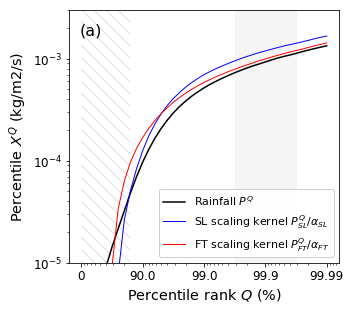

In [47]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')
ax.set_ylim((1e-5,3e-3))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)

subplotRanksILog(ax,results_dict['ranks_ref'],[cdf_pr,cdf_pr_sc,cdf_pr_OGS09],
                                               col=['k','blue','r'],ltype=['-','-','-'],
                                                linewidth=[1.5,1,1],
                 labels=[r'Rainfall $P^Q$',r'SL scaling kernel $P_{SL}^Q/\alpha_{SL}$',
                         r'FT scaling kernel $P_{FT}^Q/\alpha_{FT}$'],\
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel(r'Percentile rank $Q$ (%)')
ax.set_ylabel('Percentile $X^Q$ (kg/m2/s)')

ax.legend(loc='lower right',framealpha=0.95,fontsize=11)

ax.text(0.04,0.9,'(a)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_percentiles_pr_and_SL_FT_%s.pdf'%(output_suffix_1scale)),
                bbox_inches='tight')
plt.show()

/anaconda3/envs/py36F18/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/envs/py36F18/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide


The error at the 99.9th percentile is 0.0688492424147


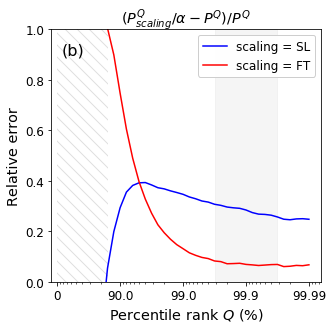

In [45]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

# ax.set_yscale('log')
# ax.set_ylim((1e-4,3e-3))
ax.set_ylim((0,1))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
i_mid = int((iQ_slice.start+iQ_slice.stop)/2)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)

err_SL = cdf_pr_sc/cdf_pr-1
err_FT = cdf_pr_OGS09/cdf_pr-1
err_FT[:iQ_min] = np.nan

subplotRanksILog(ax,results_dict['ranks_ref'],[err_SL,err_FT],
                                               col=['b','r'],ltype=['-','-'],
                 labels=['scaling = SL','scaling = FT'],
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel(r'Percentile rank $Q$ (%)')
ax.set_ylabel(r'Relative error')
ax.set_title(r'$(P_{scaling}^{Q}/\alpha-P^{Q})/P^{Q}$')
ax.legend(loc='upper right',framealpha=0.95,fontsize=12)

print("The error at the 99.9th percentile is",err_FT[i_mid])

ax.text(0.04,0.9,'(b)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_error_percentiles_pr_and_SL_FT_%s.pdf'%(output_suffix_1scale)),
                bbox_inches='tight')

plt.show()

# Multiscale numbers

In [125]:
iQ999 = indexOfRank(99.9,ranks_ref)

In [126]:
print("compute numbers:")
print()
numbers_names = 'eps','eps_OGS09','norm_var_pr_sc_prQ','norm_var_pr_scOGS09_prQ'

# Initialize results for table in paper
exp_names = {'piControl':'CTRL','abrupt4xCO2':'4xCO2'}
comp_names = {'FSPCAMm_AMIP':'SPCAM','FAMIPC5':'CAM5'}
index = ['SPCAM_CTRL','SPCAM_4xCO2','CAM5_CTRL','CAM5_4xCO2']
table = pd.DataFrame(index=index, columns=numbers_names)

results_all = {}
for experiment in 'piControl','abrupt4xCO2':
    results_all[experiment] = {}
    for compset in 'FSPCAMm_AMIP','FAMIPC5':

        results_d = results_all[experiment][compset] = {}
        
        # Load all results
        for time_stride in time_strides:
            results_d[time_stride] = {}
            for resolution in resolutions:
                
                dates = dates_label
#                 if "%s_%s"%(time_stride,resolution) in missing_dictionary[experiment][compset]:
#                     dates = dates_label2
                if time_stride == '1h':
                    dates = dates_label2
                
                resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,member,subset)
                filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates)
                filepath = os.path.join(resultdir,time_stride,resolution,filename)
                results_d[time_stride][resolution] = pickle.load(open(filepath,'rb'))

        print(experiment,compset,":")

        # Simulation name for storage in table
        sim_name = "%s_%s"%(comp_names[compset],exp_names[experiment])
        
        # Compute numbers for table
        N_prQ_Q30 = getTXVarFromResults('N_prQ',results_d,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')
        mask = N_prQ_Q30 < 30
        for number_name in 'eps','eps_OGS09':
            var = getTXVarFromResults(number_name,results_d,time_strides,resolutions,avg_mode='mean',var_type='scalar')
            var[mask] = np.nan
            var_meanscales = np.nanmean(var)
            table[number_name][sim_name] = var_meanscales
            print(number_name,'=',var_meanscales)
        for number_name in 'norm_var_pr_sc_prQ','norm_var_pr_scOGS09_prQ':
            var = getTXVarFromResults(number_name,results_d,time_strides,resolutions,iQ_slice=iQ_slice,avg_mode='mean')
            var[mask] = np.nan
            var_meanscales = np.nanmean(var)
            table[number_name][sim_name] = 2*sqrt(var_meanscales)*100
            print(number_name,'=',var_meanscales)
            print('corresponding 2sigma-error =',2*sqrt(var_meanscales))
        print()

compute numbers:

piControl FSPCAMm_AMIP :
eps = 0.835562714322
eps_OGS09 = 0.999218497757
norm_var_pr_sc_prQ = 0.0205232166913
corresponding 2sigma-error = 0.28651852778699266
norm_var_pr_scOGS09_prQ = 0.0117352717689
corresponding 2sigma-error = 0.21665891875418067

piControl FAMIPC5 :
eps = 0.867391263186
eps_OGS09 = 1.05682775788
norm_var_pr_sc_prQ = 0.032383989826
corresponding 2sigma-error = 0.3599110435980891
norm_var_pr_scOGS09_prQ = 0.0276027090018
corresponding 2sigma-error = 0.33228126039120376

abrupt4xCO2 FSPCAMm_AMIP :
eps = 0.832346260624
eps_OGS09 = 0.99791227499
norm_var_pr_sc_prQ = 0.0151233091305
corresponding 2sigma-error = 0.24595372841645713
norm_var_pr_scOGS09_prQ = 0.0100876508563
corresponding 2sigma-error = 0.20087459626685567

abrupt4xCO2 FAMIPC5 :
eps = 0.902577277878
eps_OGS09 = 1.07246402372
norm_var_pr_sc_prQ = 0.030321578389
corresponding 2sigma-error = 0.3482618462535313
norm_var_pr_scOGS09_prQ = 0.0331674624041
corresponding 2sigma-error = 0.3642387261

In [128]:
print(table.to_latex(float_format=lambda x:"%2.2f"%x))

\begin{tabular}{lllll}
\toprule
{} &  eps & eps\_OGS09 & norm\_var\_pr\_sc\_prQ & norm\_var\_pr\_scOGS09\_prQ \\
\midrule
SPCAM\_CTRL  & 0.84 &      1.00 &              28.65 &                   21.67 \\
SPCAM\_4xCO2 & 0.83 &      1.00 &              24.60 &                   20.09 \\
CAM5\_CTRL   & 0.87 &      1.06 &              35.99 &                   33.23 \\
CAM5\_4xCO2  & 0.90 &      1.07 &              34.83 &                   36.42 \\
\bottomrule
\end{tabular}



## Mask low sample sizes

In [129]:
N_prQ_Q30 = getTXVarFromResults('N_prQ',results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')

# Multiscale figures

## epsilon for both scalings as a function of scale

In [130]:
print([v for v in all_varids if v.startswith('eps')])

['eps', 'eps_OGS09', 'eps_OGS09ad']


In [131]:
eps_ms = getTXVarFromResults('eps',results,time_strides,resolutions,avg_mode='mean',var_type='scalar')
N_prQ_Q30 = getTXVarFromResults('N_prQ',results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')

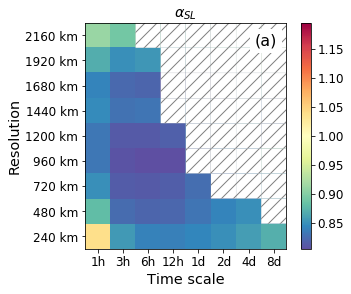

In [79]:
fig, ax = plt.subplots(ncols=1,nrows=1)
vmin = np.nanmin(eps_ms)
vmax = 2-vmin
cb = subplotMultiscaleVar(ax,eps_ms,time_strides,cmap='Spectral_r',vmin=vmin,vmax=vmax)
addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=True)
ax.set_title(r'$\alpha_{SL}$')
t = ax.text(0.84,0.9,'(a)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
plt.savefig(os.path.join(figdir,'paper_eps_pr_sc_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',pad_inches=0.05,transparent=True)
plt.show()

In [132]:
eps_OGS09_ms = getTXVarFromResults('eps_OGS09',results,time_strides,resolutions,avg_mode='mean',var_type='scalar')
N_prQ_Q30 = getTXVarFromResults('N_prQ',results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')

In [133]:
eps_OGS09_ms

array([[ 1.24811386,  1.03296133,  1.01281086,  1.00493613,  0.99853279,
         0.98741134,  0.97494592,  0.9653359 ],
       [ 1.06037831,  0.99706861,  0.99097044,  0.98743908,  0.98604787,
         0.97813594,  0.96992793,  0.9612149 ],
       [ 1.02020645,  0.98118893,  0.97619646,  0.973513  ,  0.97003421,
         0.95989989,  0.95513078,  0.96052882],
       [ 1.00077818,  0.97345585,  0.9690814 ,  0.96933131,  0.968694  ,
         0.96252812,  0.95349522,  0.95955806],
       [ 1.00165063,  0.97874198,  0.97634053,  0.97980639,  0.98215975,
         0.97326542,  0.97604876,  0.95050999],
       [ 0.99351732,  0.97353858,  0.97074921,  0.97199357,  0.97290402,
         0.98187844,  0.9764504 ,  0.98925434],
       [ 1.0289983 ,  1.00626127,  1.00146852,  0.99392383,  0.99278797,
         1.00121333,  1.01570265,  1.01830279],
       [ 1.03465363,  1.01390766,  1.01350158,  1.02354908,  1.01950172,
         1.02073841,  1.03228106,  1.0324523 ],
       [ 1.07290402,  1.05041592

In [134]:
eps_OGS09_ms_closeto1 = np.logical_and(eps_OGS09_ms >= 0.97, eps_OGS09_ms <= 1.03)
eps_OGS09_ms_closeto1_x, eps_OGS09_ms_closeto1_y = np.where(eps_OGS09_ms_closeto1.T)

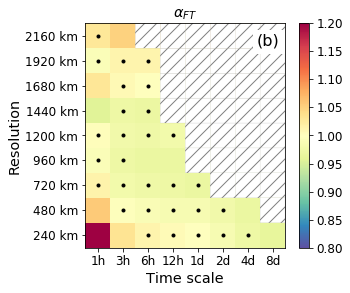

In [47]:
fig, ax = plt.subplots(ncols=1,nrows=1)
vmin = np.nanmin(eps_ms)
vmax = 2-vmin
cb = subplotMultiscaleVar(ax,eps_OGS09_ms,time_strides,cmap='Spectral_r',vmin=vmin,vmax=vmax)
# addHatchOnMask(ax,eps_OGS09_ms_closeto1,hatch='.',hide=False)
ax.scatter(eps_OGS09_ms_closeto1_x,eps_OGS09_ms_closeto1_y,marker='.',c='k')
addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=True)
ax.set_title(r'$\alpha_{FT}$')
t = ax.text(0.86,0.9,'(b)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
plt.savefig(os.path.join(figdir,'paper_eps_OGS09_pr_sc_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',pad_inches=0.05,transparent=True)
plt.show()

## Normalized variance

In [135]:
print("import 1D percentile-dependent variables")
varids_to_sum = set(('N_prQ',))
varids_to_avg = [v for v in all_varids if (v.startswith('norm_') and v.endswith('_prQ')) or v.startswith('contrib')]
varids_to_avg.extend([v for v in all_varids if v.startswith('pr')])
varids_not_to_avg = [v for v in all_varids if v.endswith('_I90') or v.endswith('_IQR')]
varids_to_avg = set(varids_to_avg).difference(set(varids_not_to_avg))

import 1D percentile-dependent variables


In [136]:
results = results_all['piControl']['FSPCAMm_AMIP']

In [137]:
print("load all variables as a function of time_stride and resolution")

ranks_ref = results[time_strides[0]][resolutions[0]]['ranks_ref']
iQ999 = indexOfRank(99.9,ranks_ref)
iQ_slice = slice(iQ999-5,iQ999+5)

iQ_label = "Q%d_Q%d"%(iQ_slice.start,iQ_slice.stop)

for varid in varids_to_avg:
    newvarid = "%s_%s"%(varid,iQ_label)
    newvar = getTXVarFromResults(varid,results,time_strides,resolutions,iQ_slice,avg_mode='mean')
    setattr(thismodule,newvarid,newvar)

for varid in ('N_prQ',):
    newvarid = "%s_Q%s"%(varid,iQ999)
    newvar = getTXVarFromResults(varid,results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')
    setattr(thismodule,newvarid,newvar)


load all variables as a function of time_stride and resolution


In [138]:
print("compute normalizes bias")
norm_bias_pr_sc_prQ_Q25_Q35 = 1-(pr_sc_vQ_Q25_Q35/pr_sc_prQ_Q25_Q35)

compute normalizes bias


In [139]:
print("sum of covariance terms")
contribQOmega_var_allcov_Q25_Q35 = contribQOmega_var_covQOmega_Q25_Q35+contribQOmega_var_covQ2Omega2_Q25_Q35

sum of covariance terms


In [140]:
# print("> Plot normalized variability and contributions")

# varids_to_plot = [v for v in locals() if v.endswith(iQ_label) and v.startswith('contrib')]

# ## Plot bias and variability
# for varid in ['norm_bias_pr_sc_prQ_Q25_Q35','norm_var_pr_sc_prQ_Q25_Q35']:
#     var = getattr(thismodule,varid)
#     # Plot
#     if varid.startswith('norm_var_'):
#         fig, ax = plt.subplots(ncols=1,nrows=1)
#         vmin = 0; vmax = None
# #         subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=vmin,vmax=vmax)
#         subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.magma,vmin=vmin,vmax=vmax)
#         ax.set_title('Normalized variance')
#     elif varid.startswith('norm_bias_'):
#         continue
#         fig, ax = plt.subplots(ncols=1,nrows=1)
#         subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.seismic)
#         ax.set_title('Normalized bias')
#     addHatchBelowThreshold(ax,N_prQ_Q30,30)
#     plt.savefig(os.path.join(figdir,'%s_%s.pdf'%(varid,dates_label.replace('-','_'))),bbox_inches='tight')
#     plt.close()

# ## Plot all contributions
# for varid in ['contribQOmega_var_varOmega_Q25_Q35',
#               'contribQOmega_var_varQ_Q25_Q35',
#               'contribQOmega_var_allcov_Q25_Q35']:
#     if '_var_' in varid and 'contribQOmega' in varid:
#         var = getattr(thismodule,varid)/norm_var_pr_sc_prQ_Q25_Q35*100
#     elif '_bias_' in varid:
#         continue
#         var = getattr(thismodule,varid)/norm_bias_pr_sc_prQ_Q25_Q35*100
#     else:
#         continue
#     # Plot
#     fig, ax = plt.subplots(ncols=1,nrows=1)
#     cb = subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=-120,vmax=120)
#     cb.ax.set_ylabel('(%)')
#     addHatchBelowThreshold(ax,N_prQ_Q30,30)
#     plt.savefig(os.path.join(figdir,'fraction_%s_%s.pdf'%(varid,dates_label.replace('-','_'))),bbox_inches='tight')
#     plt.close()


In [141]:
below_001_SL = norm_var_pr_sc_prQ_Q25_Q35 <= 0.01
below_001_SL_x, below_001_SL_y = np.where(below_001_SL.T)

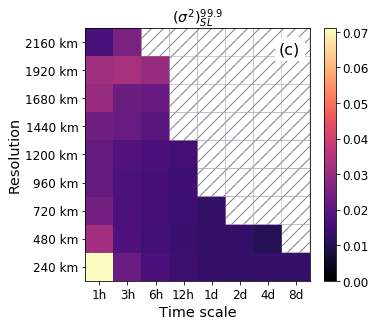

In [54]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
vmax = max(np.nanmax(norm_var_pr_sc_prQ_Q25_Q35),np.nanmax(norm_var_pr_scOGS09_prQ_Q25_Q35))
subplotMultiscaleVar(ax,norm_var_pr_sc_prQ_Q25_Q35,time_strides,cmap=plt.cm.magma,vmin=0,vmax=vmax)
ax.set_title(r'$(\sigma^2)^{99.9}_{SL}$')
# white dots below 0.01
ax.scatter(below_001_SL_x, below_001_SL_y,marker='.',c='white')
# hatch small sample sizes
addHatchBelowThreshold(ax,N_prQ_Q30,30)
t = ax.text(0.86,0.9,'(c)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
plt.savefig(os.path.join(figdir,'paper_normvar_pr_sc_%s.pdf'%(output_suffix_1scale)),bbox_inches='tight')

In [142]:
below_001_OGS09 = norm_var_pr_scOGS09_prQ_Q25_Q35 <= 0.01
below_001_OGS09_x, below_001_OGS09_y = np.where(below_001_OGS09.T)

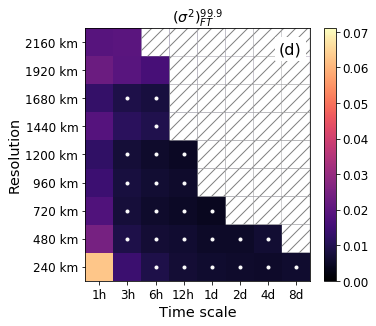

In [52]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
vmax = max(np.nanmax(norm_var_pr_sc_prQ_Q25_Q35),np.nanmax(norm_var_pr_scOGS09_prQ_Q25_Q35))
subplotMultiscaleVar(ax,norm_var_pr_scOGS09_prQ_Q25_Q35,time_strides,cmap=plt.cm.magma,vmin=0,vmax=vmax)
ax.set_title(r'$(\sigma^2)^{99.9}_{FT}$')
# white dots below 0.01
ax.scatter(below_001_OGS09_x, below_001_OGS09_y,marker='.',c='white')
# hatch small sample sizes
addHatchBelowThreshold(ax,N_prQ_Q30,30)
t = ax.text(0.86,0.9,'(d)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
plt.savefig(os.path.join(figdir,'paper_normvar_pr_OGS09_%s.pdf'%(output_suffix_1scale)),bbox_inches='tight')

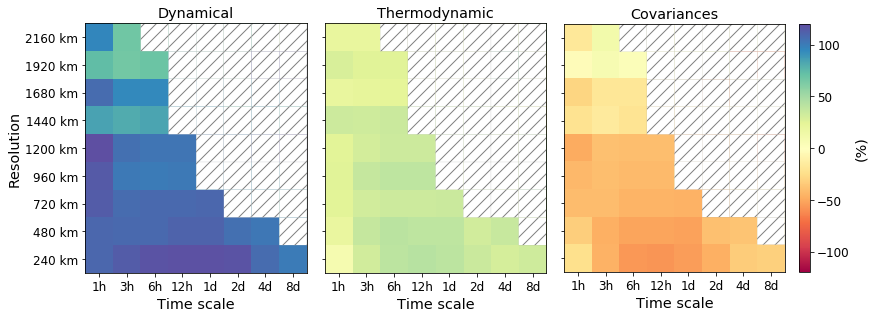

In [22]:
## Plot all contributions side by side
contrib_names = ['contribQOmega_var_varOmega_Q25_Q35',
              'contribQOmega_var_varQ_Q25_Q35',
              'contribQOmega_var_allcov_Q25_Q35']
contrib_titles = [r'Dynamical',
                  r'Thermodynamic',
                  r'Covariances']

fig = plt.figure(figsize=(12,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[5,5,5.55]) 
for i in range(3):
    # Load variable
    varid = contrib_names[i]
    var = getattr(thismodule,varid)/norm_var_pr_sc_prQ_Q25_Q35*100
    # Plot
    ax = plt.subplot(gs[i])
    ax.set_title(contrib_titles[i])
    cb = subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=-120,vmax=120,cb_on=i==2,sharey=i>0)
    addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=True)
fig.tight_layout()
cb.ax.set_ylabel('(%)')
plt.savefig(os.path.join(figdir,'paper_contrib2Var_SL_%s.pdf'%(dates_label.replace('-','_'))),bbox_inches='tight')

## Fractional change in extreme precipitation

In [143]:
results_all['abrupt4xCO2']['FSPCAMm_AMIP']['1h']['1dx']['percentiles']

array([             nan,   0.00000000e+00,   2.79458510e-10,
         4.20406790e-08,   5.98093749e-07,   2.94337142e-06,
         8.21915773e-06,   1.64414670e-05,   2.82714017e-05,
         4.46563040e-05,   6.78573124e-05,   1.01704718e-04,
         1.49566270e-04,   2.12001298e-04,   2.87557206e-04,
         3.71283204e-04,   4.60593762e-04,   5.51809418e-04,
         6.43420028e-04,   7.34194766e-04,   8.23230649e-04,
         9.10647908e-04,   9.95745141e-04,   1.07905892e-03,
         1.15907656e-03,   1.23767193e-03,   1.31333756e-03,
         1.38660303e-03,   1.45735023e-03,   1.52761632e-03,
         1.59548802e-03,   1.66135831e-03,   1.72520068e-03,
         1.79009950e-03,   1.85498202e-03,   1.91780777e-03,
         1.97939591e-03,   2.04389764e-03,   2.10361835e-03,
         2.15929551e-03,   2.21797856e-03])

In [144]:
N_prQ_Q30 = getTXVarFromResults('N_prQ',results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')

In [145]:
pr_warm_SPCAM = getTXVarFromResults('percentiles',results_all['abrupt4xCO2']['FSPCAMm_AMIP'],time_strides,resolutions,iQ_slice,avg_mode='mean',var_type='scalar')
pr_cold_SPCAM = getTXVarFromResults('percentiles',results_all['piControl']['FSPCAMm_AMIP'],time_strides,resolutions,iQ_slice,avg_mode='mean',var_type='scalar')

In [146]:
frac_change_pr = (pr_warm_SPCAM/pr_cold_SPCAM - 1)/4.3

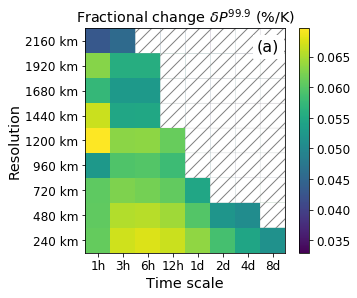

In [147]:
var = frac_change_pr.copy()

fig, ax = plt.subplots(ncols=1,nrows=1)
cb = subplotMultiscaleVar(ax,var,time_strides)
addHatchBelowThreshold(ax,N_prQ_Q30,30)
t = ax.text(0.86,0.9,'(a)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
ax.set_title(r'Fractional change $\delta P^{99.9}$ (%/K)')
plt.savefig(os.path.join(figdir,'paper_frac_change_pr_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

## 2-sigma error on the fractional change of P

\begin{equation}
	err_{abs,FT} \left(\frac{\Delta P^{99.9}}{P^{99.9}\Delta T}\right) = \frac{2}{\Delta T} \frac{P^{99.9}_{FT,4xCO2}}{P^{99.9}_{FT,PI}} 
	\sqrt{\left(\sigma^{99.9}_{FT,4xCO2}\right)^2 + \left(\sigma^{99.9}_{FT,PI}\right)^2}
\end{equation}


In [148]:
print("load percentiles")
pr_warm_SPCAM = getTXVarFromResults('percentiles',results_all['abrupt4xCO2']['FSPCAMm_AMIP'],time_strides,
                                    resolutions,iQ_slice,avg_mode='mean',var_type='scalar')
pr_cold_SPCAM = getTXVarFromResults('percentiles',results_all['piControl']['FSPCAMm_AMIP'],time_strides,
                                    resolutions,iQ_slice,avg_mode='mean',var_type='scalar')


load percentiles


In [149]:
print("load normalized variances as a function of time_stride and resolution")

ranks_ref = results[time_strides[0]][resolutions[0]]['ranks_ref']
iQ999 = indexOfRank(99.9,ranks_ref)
iQ_slice = slice(iQ999-5,iQ999+5)

iQ_label = "Q%d_Q%d"%(iQ_slice.start,iQ_slice.stop)

for varid in ['norm_var_pr_scOGS09_prQ']:
    newvarid_cold = "%s_cold_SPCAM_%s"%(varid,iQ_label)
    newvar_cold = getTXVarFromResults(varid,results_all['piControl']['FSPCAMm_AMIP'],
                                 time_strides,resolutions,iQ_slice,avg_mode='mean')
    newvarid_warm = "%s_warm_SPCAM_%s"%(varid,iQ_label)
    newvar_warm = getTXVarFromResults(varid,results_all['abrupt4xCO2']['FSPCAMm_AMIP'],
                                 time_strides,resolutions,iQ_slice,avg_mode='mean')
    setattr(thismodule,newvarid_cold,newvar_cold)
    setattr(thismodule,newvarid_warm,newvar_warm)



load normalized variances as a function of time_stride and resolution


In [150]:
print("compute 2-sigma error in the fractional change of P")
err2sigma_frac_pr_FT = 2/4.3*pr_warm_SPCAM/pr_cold_SPCAM*np.sqrt(norm_var_pr_scOGS09_prQ_cold_SPCAM_Q25_Q35+
                                                                 norm_var_pr_scOGS09_prQ_warm_SPCAM_Q25_Q35)

compute 2-sigma error in the fractional change of P


In [160]:
print("compute threshold for signal-to-noise ratio greater than 1")
err2s_below_frachange_FT = err2sigma_frac_pr_FT <= frac_change_pr
err2s_below_frachange_FT_x, err2s_below_frachange_FT_y = np.where(err2s_below_frachange_FT.T)
print("compute threshold for signal-to-noise ratio greater than 0.8")
err2s_below_2frachange_FT = 0.8*err2sigma_frac_pr_FT <= frac_change_pr
err2s_below_2frachange_FT_x, err2s_below_2frachange_FT_y = np.where(err2s_below_2frachange_FT.T)

# err2s_below_3frachange_FT = err2sigma_frac_pr_FT <= 1.2*frac_change_pr
# err2s_below_3frachange_FT_x, err2s_below_3frachange_FT_y = np.where(err2s_below_3frachange_FT.T)

compute threshold for signal-to-noise ratio greater than 1
compute threshold for signal-to-noise ratio greater than 0.8


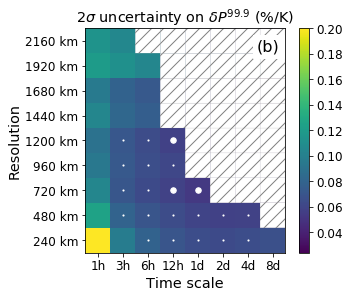

In [161]:
var = err2sigma_frac_pr_FT.copy()

fig, ax = plt.subplots(ncols=1,nrows=1)
cb = subplotMultiscaleVar(ax,var,time_strides)
# white dots below frac_change_pr
ax.scatter(err2s_below_2frachange_FT_x, err2s_below_2frachange_FT_y,marker='.',s=5,c='white')
# ax.scatter(err2s_below_2frachange_FT_x, err2s_below_2frachange_FT_y,marker='.',c='white')
ax.scatter(err2s_below_frachange_FT_x, err2s_below_frachange_FT_y,marker='o',s=30,c='white')
# hatch small sample sizes
addHatchBelowThreshold(ax,N_prQ_Q30,30)
t = ax.text(0.86,0.9,'(b)',transform = ax.transAxes,fontsize=16)
t.set_bbox(dict(facecolor='white',alpha=1,edgecolor='white'))
ax.set_title(r'$2\sigma$ uncertainty on $\delta P^{99.9}$ (%/K)')
plt.savefig(os.path.join(figdir,'paper_2sigmaerr_frac_change_pr_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

# Subgridscale plot

In [25]:
print("load precomputed results")

load precomputed results


In [32]:
compset = 'FSPCAMm_AMIP'
experiment = 'piControl'
member = 'r1i1p1'
subset = 'tropics'
time_stride = '1h'
resolution = '1dx'

sgs_resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,member,subset,\
                      time_stride,resolution)

In [33]:
dates_label_full = '185005010100-185105010000'
dates_label = dates_label_full
dates = tuple(dates_label.split('-'))
output_suffix = 'Q%d-Q%d_%s'%(iQ_min,iQ_max,'-'.join(dates))
result_dict_file = 'subgridscale_results_dictionary_%s.pickle'%output_suffix

In [35]:
dict_sgs = pickle.load(open(os.path.join(sgs_resultdir,result_dict_file),"rb"))

In [36]:
dict_sgs.keys()

dict_keys(['crmpr_fft_I25_prQ', 'crmpr_fft_I50_prQ', 'crmpr_fft_I75_prQ', 'crmpr_fft_max_prQ', 'crmpr_fftrel_I25_prQ', 'crmpr_fftrel_I50_prQ', 'crmpr_fftrel_I75_prQ', 'crmpr_fftrel_max_prQ', 'crmprfrac_I25_prQ', 'crmprfrac_I50_prQ', 'crmprfrac_I75_prQ', 'crmprsize_I25_prQ', 'crmprsize_I50_prQ', 'crmprsize_I75_prQ'])

Show the fraction of rain in the largest event as a function of percentile rank


/Users/bfildier/Code/researchProjects/dataAnalysis/extreme-rain-predictability-across-scales/functions/plot1DInvLog.py:80: RuntimeWarning: invalid value encountered in greater_equal
  ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor=col,alpha=alpha, interpolate=True)


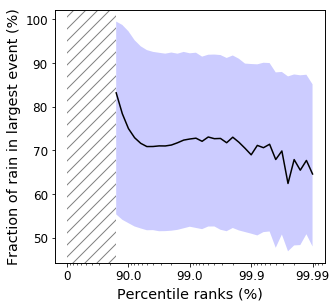

In [41]:
print("Show the fraction of rain in the largest event as a function of percentile rank")

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

# Add zero line
addZeroLine(ax,ranks_ref)

subplotRanksILog(ax,ranks_ref,
                 dict_sgs['crmprfrac_I50_prQ'][:,0]*100,
                 col='k',ltype='-',transformX=False)

subplotYShadingRanksILog(ax,ranks_ref,[dict_sgs['crmprfrac_I25_prQ'][:,0]*100,
                                       dict_sgs['crmprfrac_I75_prQ'][:,0]*100],col='blue',transformX=False)

addXHatchRanksILog(ax,ranks_ref,(0,iQ_min),transformX=True)
    
ax.set_xlabel('Percentile ranks (%)')
ax.set_ylabel('Fraction of rain in largest event (%)')

# ax.legend(['median','max','quartiles'],framealpha=0.8)
plt.savefig(os.path.join(figdir,'paper_IQrange_and_max_FFTnormalized_crmpr_pr_%s.pdf'%(output_suffix)),
        bbox_inches='tight')
plt.show()